In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

# Descriptive Statistics and Visualizations

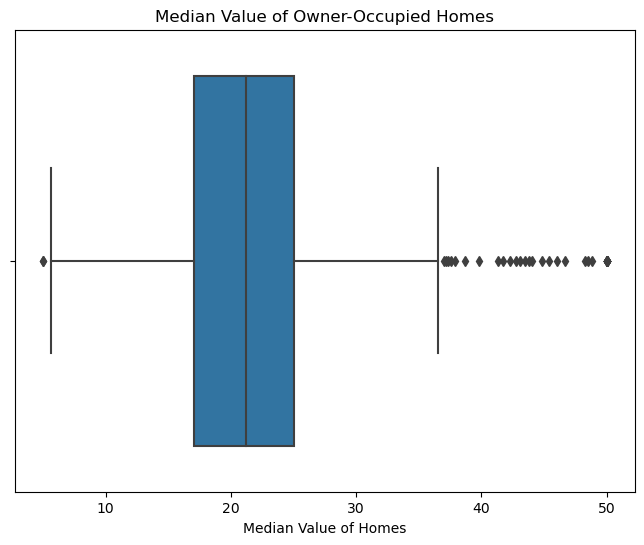

In [3]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title("Median Value of Owner-Occupied Homes")
plt.xlabel("Median Value of Homes")
plt.show()


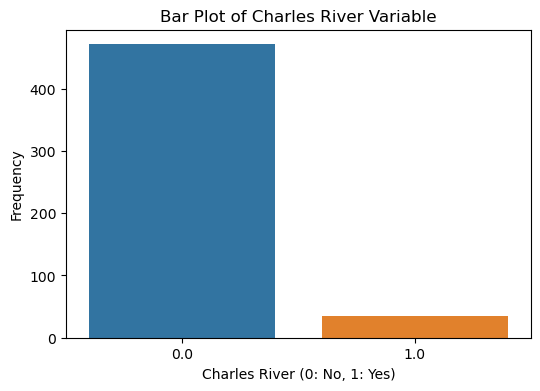

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x=boston_df['CHAS'])
plt.title("Bar Plot of Charles River Variable")
plt.xlabel("Charles River (0: No, 1: Yes)")
plt.ylabel("Frequency")
plt.show()

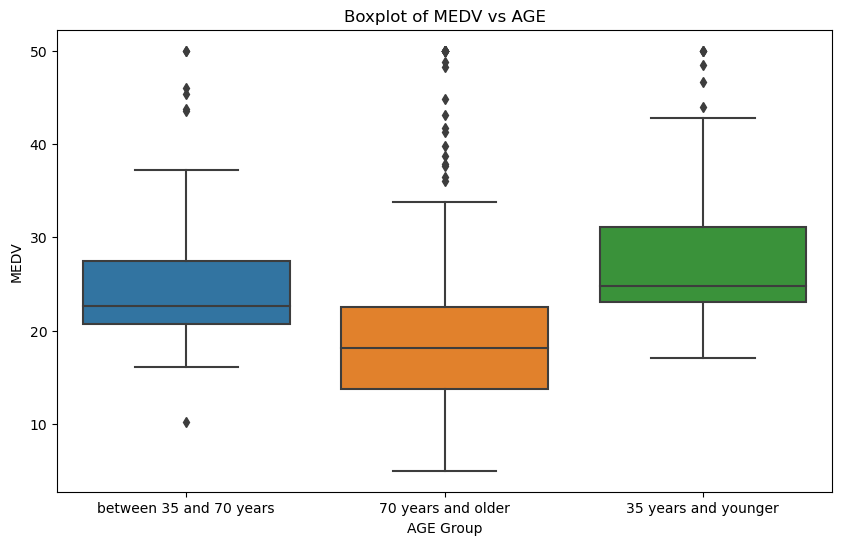

In [5]:
boston_df.loc[boston_df['AGE'] <= 35, 'AGE_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'AGE_Group'] = 'between 35 and 70 years'
boston_df.loc[boston_df['AGE'] > 70, 'AGE_Group'] = '70 years and older'

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title("Boxplot of MEDV vs AGE")
plt.xlabel("AGE Group")
plt.ylabel("MEDV")
plt.show()

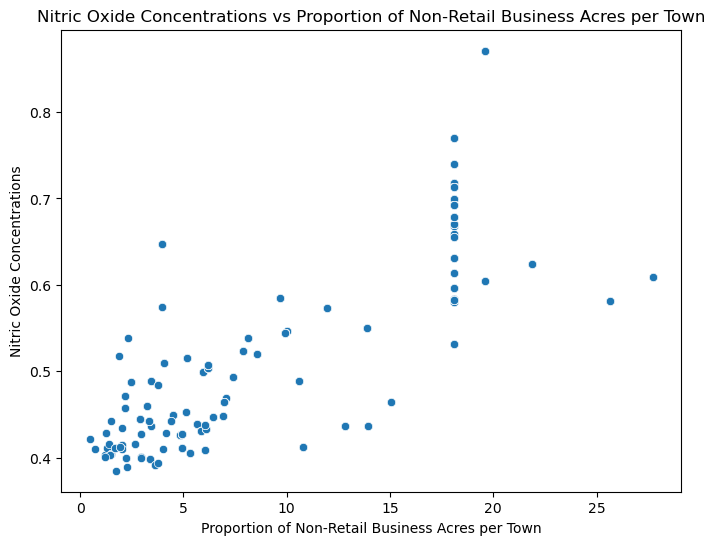

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title("Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres per Town")
plt.xlabel("Proportion of Non-Retail Business Acres per Town")
plt.ylabel("Nitric Oxide Concentrations")
plt.show()

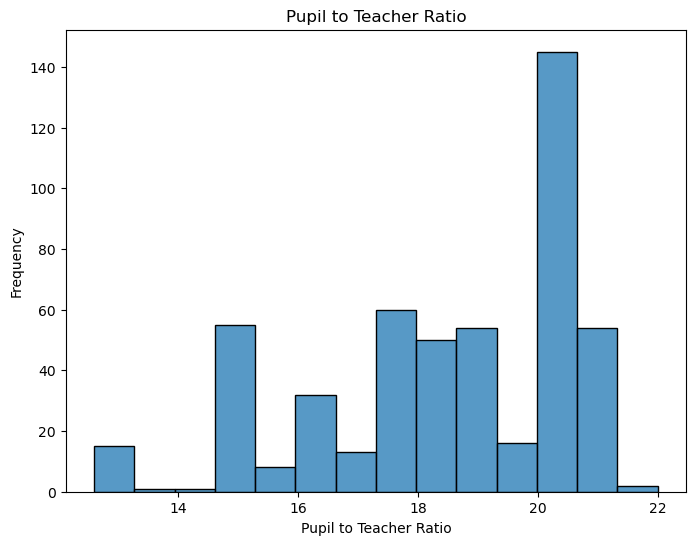

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(data=boston_df, x='PTRATIO', kde=False)
plt.title("Pupil to Teacher Ratio")
plt.xlabel("Pupil to Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

# Tests to answer the questions

## Task 1: T-test for Independent Samples

In [8]:
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_statistic, p_value = stats.ttest_ind(group1, group2)
print("Task 1 - T-test for Independent Samples:")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

Task 1 - T-test for Independent Samples:
t-statistic: 3.996437466090509
p-value: 7.390623170519905e-05


Reject the Null Hypothesis: There is no significant difference in median value of houses bounded by the Charles river.

## Task 2: ANOVA

In [14]:
groups = []
unique_ages = boston_df['AGE'].unique()
for age in unique_ages:
    group = boston_df[boston_df['AGE'] == age]['MEDV']
    groups.append(group)

f_statistic, p_value = stats.f_oneway(*groups)

print("ANOVA Test for Median Values of Houses for Different AGE Groups:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

ANOVA Test for Median Values of Houses for Different AGE Groups:
F-statistic: 0.9840091646131573
p-value: 0.5539698276810093


Fail to Reject Null Hypothesis: No significant difference  in Median values of houses for each proportion of owner occupied units built prior to 1940.

## Task 3: Pearson Correlation

In [13]:
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("\nTask 3 - Pearson Correlation:")
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"p-value: {p_value}")


Task 3 - Pearson Correlation:
Correlation Coefficient: 0.7636514469209151
p-value: 7.913361061238693e-98


Reject Null Hypothesis: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

## Task 4: Regression Analysis

In [17]:
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()
print("\nTask 4 - Regression Analysis:")
print(model.summary())
if model.pvalues['DIS'] < 0.05:
    print("Reject Null Hypothesis: There is an impact.")
else:
    print("Fail to Reject Null Hypothesis: No impact.")


Task 4 - Regression Analysis:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        10:27:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901

Reject Null Hypothesis: There is an impact of  1,1 times an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.